In [1]:
#Neural Network For Handwritten Digits Classification | Deep Learning Tutorial 7 (Tensorflow2.0)
#  https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO


import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

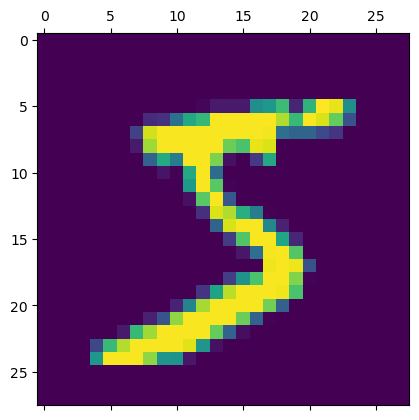

In [6]:
plt.matshow(X_train[0])

In [7]:
Y_train[0]

5

In [8]:
#Scaling the dataset by dividing the whole dataset by 255 effictivly converting it into value between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [9]:
# now values are inbetween 0 and 1
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# flattening process
x_train = X_train.reshape(len(X_train),28*28)
x_test = X_test.reshape(len(X_test),28*28)

In [11]:
x_train.shape
# x_train.astype(float)

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

model.fit(x_train, Y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4761 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3052 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2839 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9261


In [13]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 0s 962us/step - loss: 0.2680 - accuracy: 0.9259


[0.26802951097488403, 0.9258999824523926]

In [14]:
# fun 

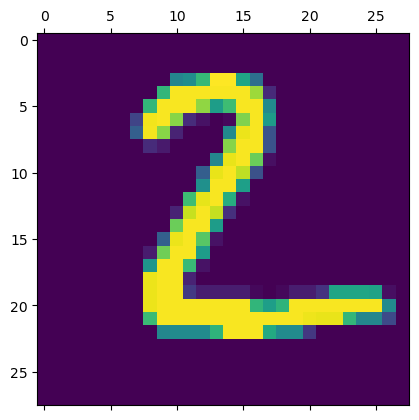

In [15]:
plt.matshow(X_test[1])

In [16]:
y_pred = model.predict(x_test)
y_pred[1]


313/313 [==============================] - 0s 852us/step


array([3.7693515e-01, 2.8858301e-03, 9.9906725e-01, 3.1740060e-01,
       6.1263428e-10, 8.1278837e-01, 8.7014991e-01, 1.4807394e-12,
       1.0540314e-01, 2.2644988e-09], dtype=float32)

In [17]:
np.argmax(y_pred[1])

2

In [18]:
# this can predict the testdata set for all and that can be compared to test
x = [np.argmax(i) for i in y_pred]
x[:5]

[7, 2, 1, 0, 4]

In [19]:
# comparing
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
# -----------------X-------------X------------------

In [21]:
# confusn matrix
cm = tf.math.confusion_matrix(labels=Y_test,predictions = x)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   8,    9,  926,   19,   11,    2,   12,   11,   31,    3],
       [   3,    0,   19,  926,    0,   22,    2,   12,   19,    7],
       [   2,    1,    3,    1,  927,    0,    9,    4,   11,   24],
       [  10,    3,    4,   33,   11,  785,   11,    6,   25,    4],
       [  10,    3,    7,    1,    9,   15,  908,    2,    3,    0],
       [   1,    5,   22,    8,    9,    1,    0,  953,    3,   26],
       [   9,    7,    7,   28,    9,   29,    9,   12,  858,    6],
       [  11,    7,    1,   12,   38,   10,    0,   27,    3,  900]])>

Text(95.72222222222221, 0.5, 'True')

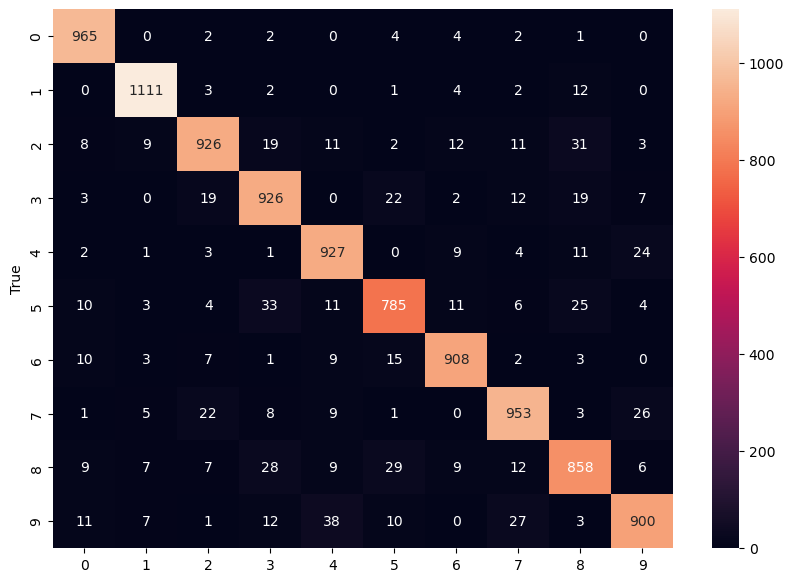

In [22]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm, annot =True, fmt ='d')
plt.ylabel('True')

In [23]:
#------------x-------------------x----------------x------

In [24]:
# lets add hiddne layer

model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])

model1.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

model1.fit(x_train, Y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2791 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1237 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0859 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0645 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0510 - accuracy: 0.9843


In [25]:
model1.evaluate(x_test, Y_test) 

313/313 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9756


[0.07693962752819061, 0.975600004196167]

313/313 [==============================] - 0s 962us/step


Text(95.72222222222221, 0.5, 'True')

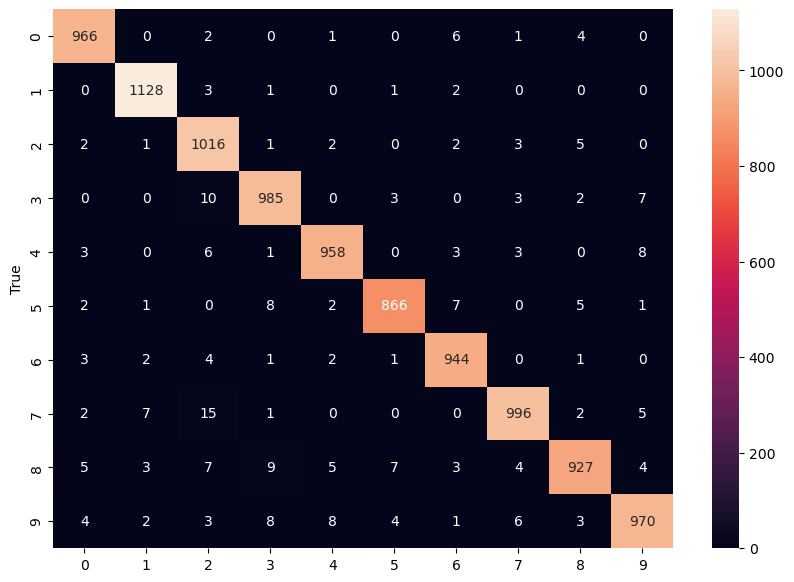

In [26]:
y_pred = model1.predict(x_test)
x = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=Y_test,predictions = x)

import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm, annot =True, fmt ='d')
plt.ylabel('True')

In [27]:
# if you dont wnat to do flattening, therfore keras has a flatten layer
# so need to x_train = X_train.reshape(len(X_train),28*28)


model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])

model2.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

model2.fit(X_train, Y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2725 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1239 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0854 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0660 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0519 - accuracy: 0.9836


In [28]:
#-------------------------xxxxxx-----------------------xxxxxx----------------------------------xxxxxxxxxx-----------------------

In [29]:
# TESTING MY OWN DIGIT IMAGES !!

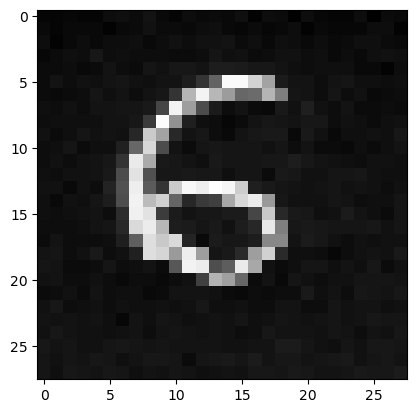

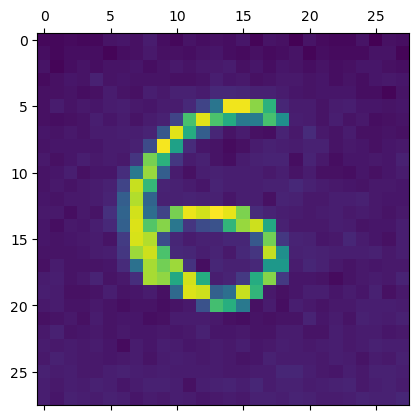

In [30]:
import cv2
#load image
file= r'C:\Users\Swagat\Downloads\6.jpeg'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

#preview image
plt.imshow(test_image, cmap='gray')

# resize image
img_resize = cv2.resize(test_image,(28,28), interpolation=cv2.INTER_LINEAR)
img_resize = cv2.bitwise_not(img_resize)

#preview
plt.imshow(img_resize, cmap='gray')
plt.matshow(img_resize)

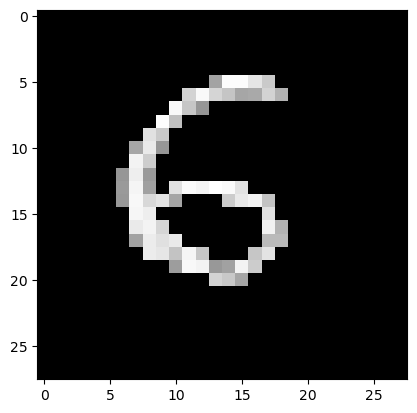

In [31]:
a=img_resize
import numpy as np


a[a < 130] = 0
plt.imshow(a, cmap='gray')


(2, 28, 28)


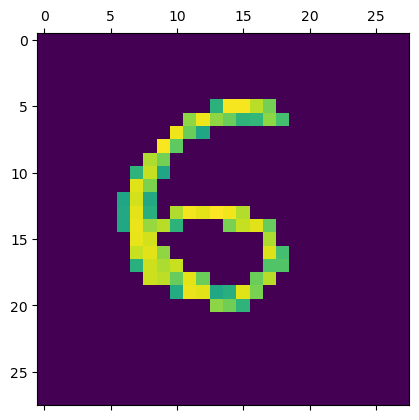

In [32]:
import numpy as np

dule = np.zeros((2, 28, 28), dtype=np.uint8)
dule[0] = a

# print(dule[0])  # Print the first element of dule
print(dule.shape)  # Print the shape of dule
plt.matshow(dule[0])

In [33]:
dule = dule/255
dule_flat = dule.reshape(len(dule),28*28)
# a = a/255
dule_flat.shape

(2, 784)

In [34]:
y_pred = model1.predict(dule_flat)
y_pred[0]

1/1 [==============================] - 0s 24ms/step


array([9.74645689e-02, 2.93959656e-05, 3.11785579e-01, 1.02489407e-03,
       1.17745616e-01, 7.25619912e-01, 8.87524307e-01, 4.20221407e-03,
       3.27044934e-01, 7.77890563e-01], dtype=float32)

In [35]:
np.argmax(y_pred[0])

6

In [36]:
x = [np.argmax(i) for i in y_pred]
x[:2]

[6, 5]

In [37]:
#---------------------x ------------------------ x ------------------------- x--------------- ALL IN ONE !!-----X

(2, 28, 28)
1/1 [==============================] - 0s 28ms/step
THE OUTPUT IS :' 9 '


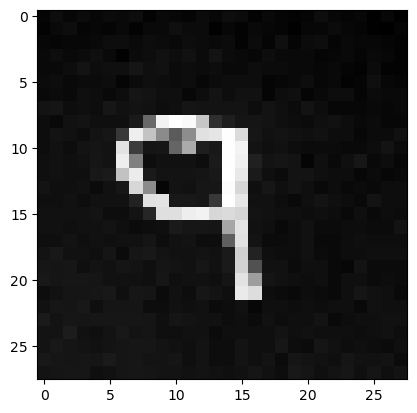

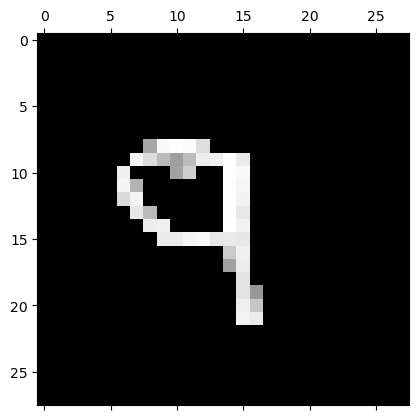

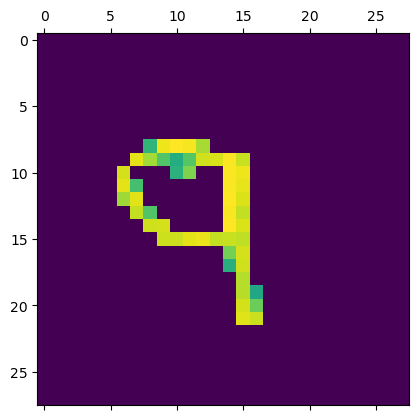

In [52]:
import cv2
#load image
file= r'C:\Users\Swagat\Downloads\9.jpeg'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

#preview image
plt.imshow(test_image, cmap='gray')

# resize image
img_resize = cv2.resize(test_image,(28,28), interpolation=cv2.INTER_LINEAR)
img_resize = cv2.bitwise_not(img_resize)

#preview
plt.imshow(img_resize, cmap='gray')
plt.matshow(img_resize)

a=img_resize
import numpy as np


a[a < 130] = 0
plt.imshow(a, cmap='gray')

import numpy as np

dule = np.zeros((2, 28, 28), dtype=np.uint8)
dule[0] = a

# print(dule[0])  # Print the first element of dule
print(dule.shape)  # Print the shape of dule
plt.matshow(dule[0])

dule = dule/255
dule_flat = dule.reshape(len(dule),28*28)
# a = a/255
dule_flat.shape
y_pred = model1.predict(dule_flat)
y_pred[0]
print("THE OUTPUT IS :'",np.argmax(y_pred[0]),"'")